In [29]:
import pandas as pd
from sklearn.metrics import classification_report

In [7]:
#

SyntaxError: invalid syntax (<ipython-input-7-3f73528f1c19>, line 1)

In [8]:
df=pd.read_csv('./Data/wine.csv')

In [9]:
df

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
df['Proline']

0      1065
1      1050
2      1185
3      1480
4       735
       ... 
173     740
174     750
175     835
176     840
177     560
Name: Proline, Length: 178, dtype: int64

In [12]:
# MalicAcid, Ash, AlcAsh, Mg, Phenols, Proa, Color, Hue, OD, and Proline.
new_df=df[['Y','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']]

In [13]:
new_df.to_csv('./Data/conv_wine.csv',index=False)

In [14]:
df_pred_pruned=pd.read_csv('./Data/Q_3_pred_result.csv')

In [15]:
df_pred_full=pd.read_csv('./Data/Q_3_pred_result_full.csv')

In [16]:
df_test=pd.read_csv('./Data/Q_3_test.csv')

In [17]:
df_train=pd.read_csv('./Data/Q_3_train.csv')

In [18]:
answer=df_test['Y']

In [19]:
arr_pred_full=[]
for rows in range(len(df_pred_full)):
    #print(df_pred_full.iloc[rows].idxmax())
    a=df_pred_full.iloc[rows].idxmax()
    a=int(a)
    arr_pred_full.append(a)

In [20]:
arr_pred_pruned=[]
for rows in range(len(df_pred_pruned)):
    #print(df_pred_pruned.iloc[rows].idxmax())
    a=df_pred_pruned.iloc[rows].idxmax()
    a=int(a)
    arr_pred_pruned.append(a)

In [21]:
from sklearn.metrics import confusion_matrix
Full_data=confusion_matrix(answer,arr_pred_full)
Full_data


array([[14,  0,  0],
       [ 2, 23,  1],
       [ 0,  0, 14]], dtype=int64)

In [30]:
print(classification_report(answer,arr_pred_full))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.94        26
           3       0.93      1.00      0.97        14

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.95        54
weighted avg       0.95      0.94      0.94        54



In [31]:
pruned=confusion_matrix(answer,arr_pred_pruned)
pruned

array([[14,  0,  0],
       [ 2, 20,  4],
       [ 0,  0, 14]], dtype=int64)

In [32]:
print(classification_report(answer,arr_pred_pruned))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.77      0.87        26
           3       0.78      1.00      0.88        14

    accuracy                           0.89        54
   macro avg       0.88      0.92      0.89        54
weighted avg       0.91      0.89      0.89        54



In [33]:
RF=pd.read_csv('./Data/Q_3_RF_result.csv')

In [34]:
y_hat_RF=RF['y_hat']
y_answer_RF=RF['test.Y']
y_hat_RF=round(y_hat_RF)
print(confusion_matrix(y_answer_RF,y_hat_RF))

print(classification_report(y_answer_RF,y_hat_RF))


[[19  1  0]
 [ 0 19  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        20
           2       0.95      0.95      0.95        20
           3       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



In [35]:
df_test


,Y,MalicAcid,Ash,AlcAsh,Mg,Phenols,Proa,Color,Hue,OD,Proline
0,1,2.15,2.61,17.6,121,2.60,1.25,5.05,1.06,3.58,1295
1,1,2.16,2.30,18.0,105,2.95,2.38,5.75,1.25,3.17,1510
2,1,1.48,2.32,16.8,95,2.20,1.57,5.00,1.17,2.82,1280
3,1,1.87,2.38,12.0,102,3.30,2.96,7.50,1.20,3.00,1547
4,1,1.59,2.48,16.5,108,3.30,1.86,8.70,1.23,2.82,1680
5,1,1.86,2.36,16.6,101,2.61,1.69,3.80,1.11,4.00,1035
6,1,1.72,2.14,17.0,94,2.40,1.35,3.95,1.02,2.77,1285
7,1,1.90,2.80,19.4,107,2.95,1.76,4.50,1.25,3.40,915
8,1,1.53,2.70,19.5,132,2.95,1.35,5.40,1.25,3.00,1235
9,1,3.99,2.51,13.2,128,3.00,2.08,5.10,0.89,3.53,760


In [36]:
df_train

,Y,MalicAcid,Ash,AlcAsh,Mg,Phenols,Proa,Color,Hue,OD,Proline
0,2,0.92,2.00,19.0,86,2.42,1.43,2.50,1.38,3.12,278
1,2,1.73,2.12,19.0,80,1.65,1.63,3.40,1.00,3.17,510
2,3,3.83,2.38,21.0,88,2.30,1.04,7.65,0.56,1.58,520
3,2,1.36,2.02,16.8,100,2.02,0.62,5.75,0.98,1.59,450
4,2,5.80,2.13,21.5,86,2.62,2.01,2.60,0.73,3.10,380
...,...,...,...,...,...,...,...,...,...,...,...
119,3,4.12,2.38,19.5,89,1.80,1.56,9.01,0.57,1.64,480
120,1,3.98,2.29,17.5,103,2.64,1.66,4.36,0.82,3.00,680
121,1,2.05,3.22,25.0,124,2.63,1.92,3.58,1.13,3.20,830
122,1,1.60,2.52,17.8,95,2.48,1.46,3.93,1.09,3.63,1015


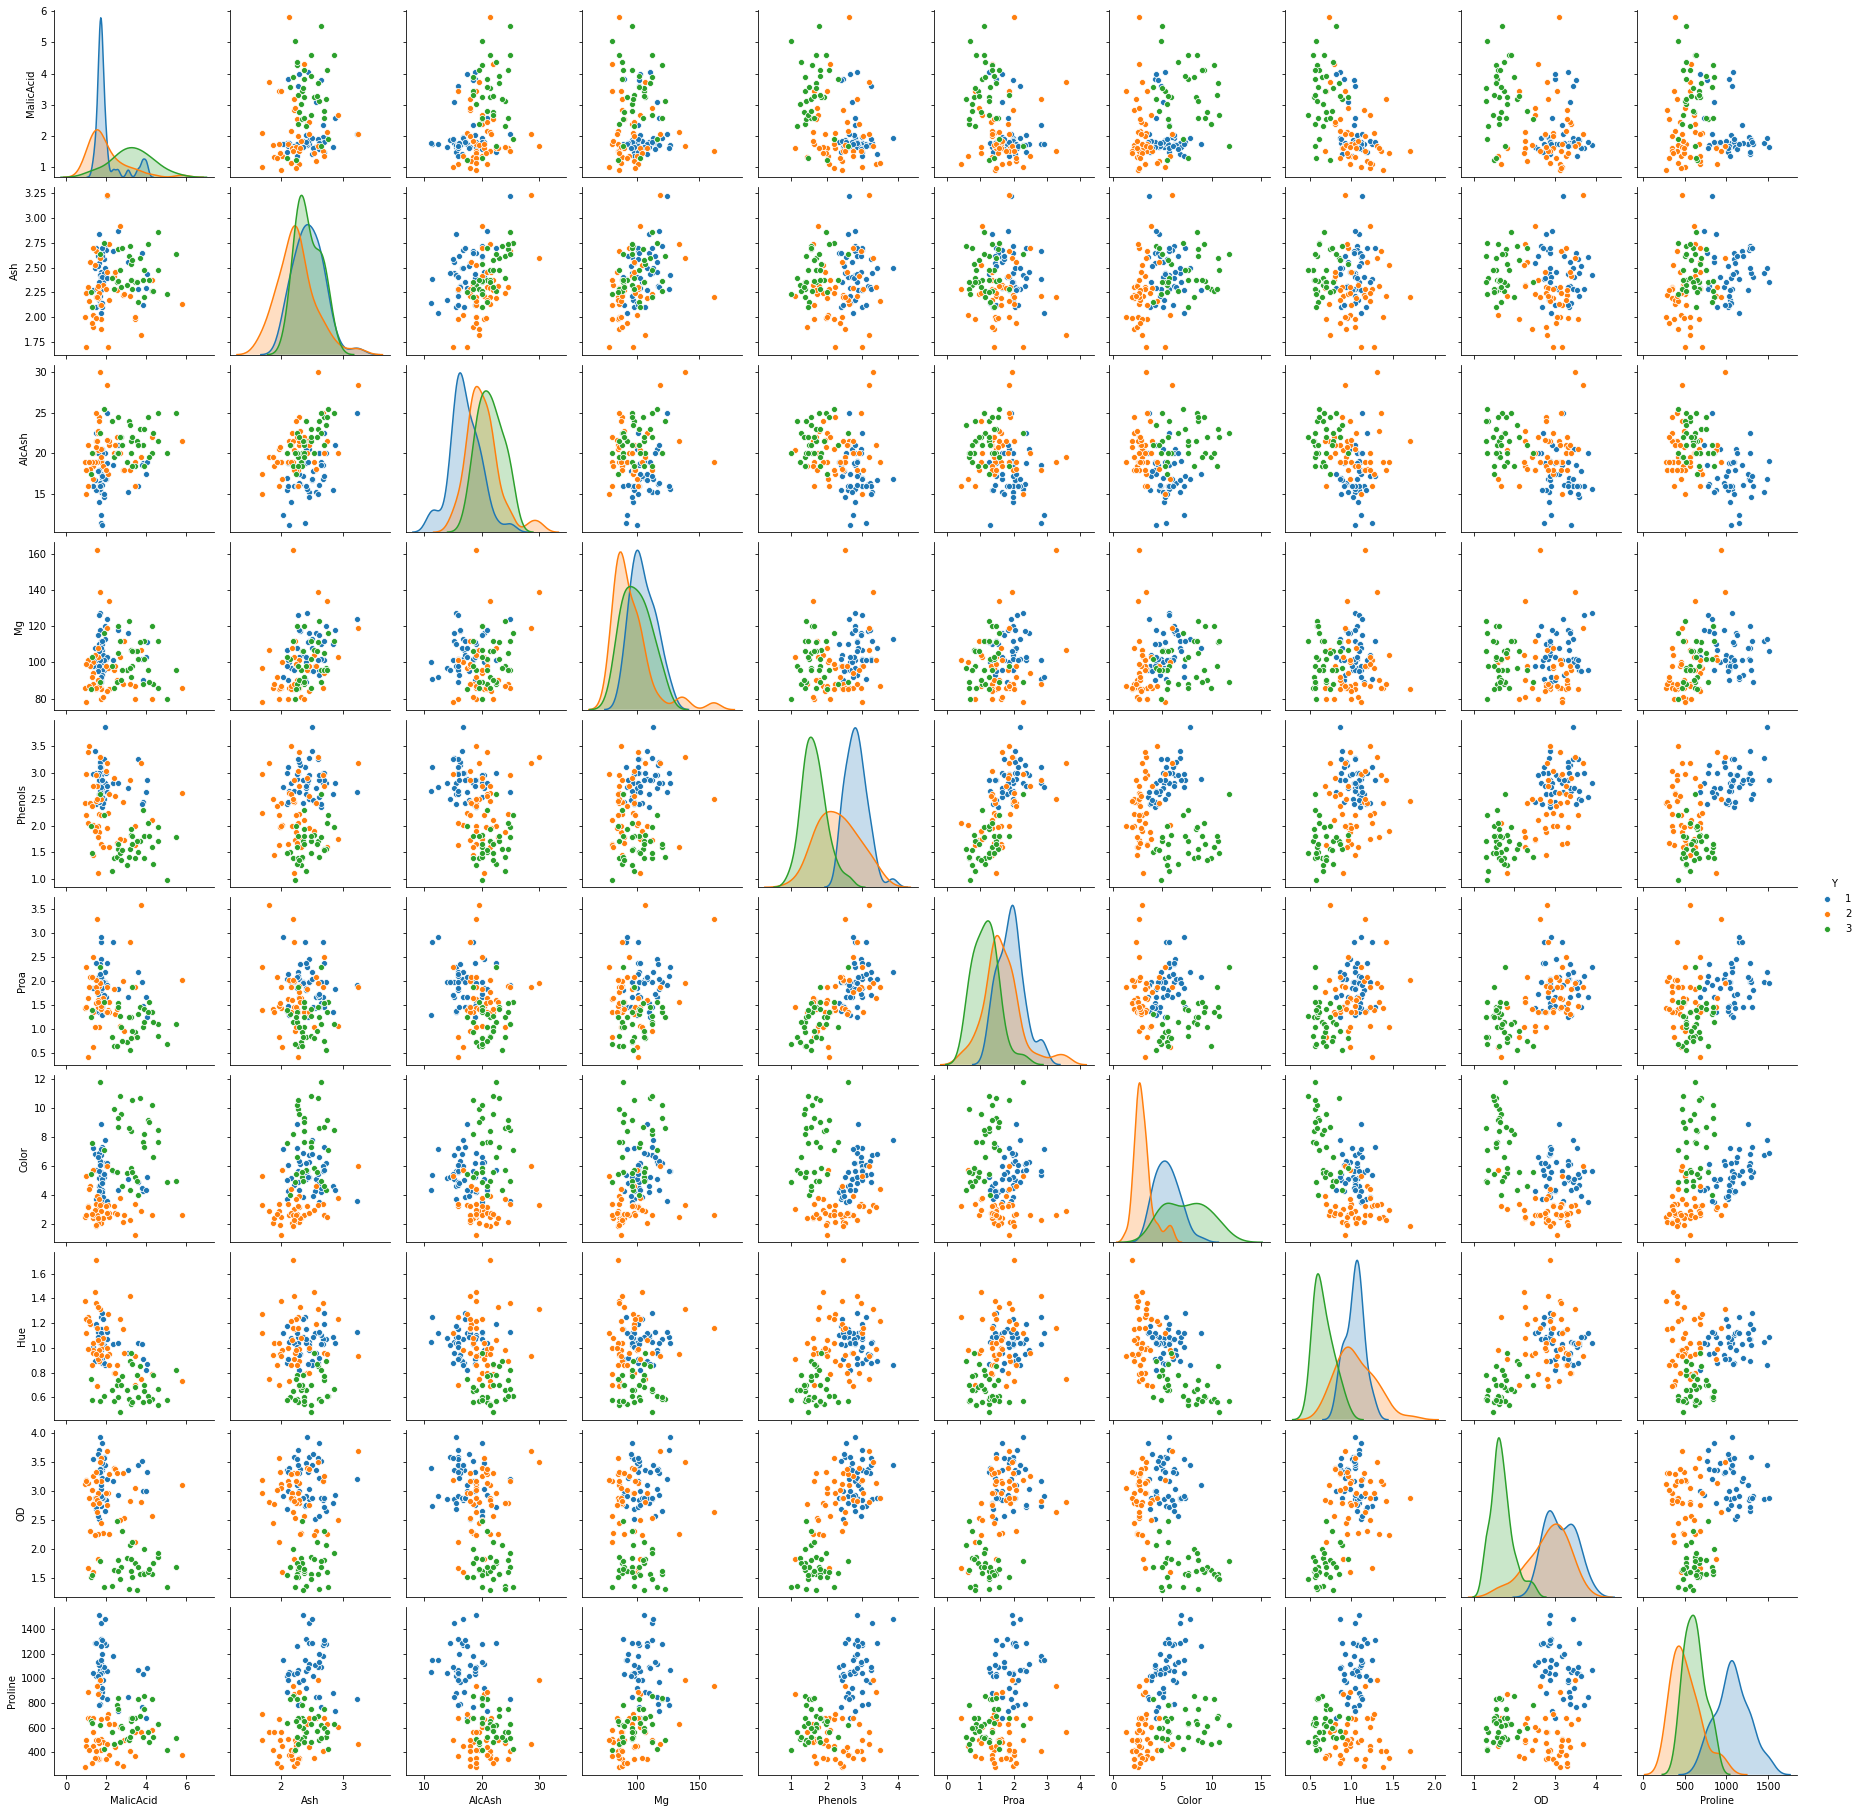

In [33]:
import seaborn as sns
sns.pairplot(df_train, hue='Y')

In [37]:
#Barolo, Grignolino, Barbera


Barolo=df_train.loc[df_train.Y==1]

Grignolino=df_train.loc[df_train.Y==2]

Barbera=df_train.loc[df_train.Y==3]



In [38]:
Barolo.cov()

,Y,MalicAcid,Ash,AlcAsh,Mg,Phenols,Proa,Color,Hue,OD,Proline
Y,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MalicAcid,0.0,0.508271,0.002504,0.288480,-0.154636,-0.034865,-0.049678,-0.244573,-0.030906,0.031825,-47.693788
Ash,0.0,0.002504,0.057156,0.376890,0.879500,-0.004897,-0.015037,-0.051017,0.005281,-0.013029,-0.041717
AlcAsh,0.0,0.288480,0.376890,7.084313,8.735000,-0.127930,-0.082184,-0.491385,0.012257,-0.124878,-62.373990
Mg,0.0,-0.154636,0.879500,8.735000,97.563636,0.895409,0.218182,2.494591,-0.110500,0.333318,-332.340909
Phenols,0.0,-0.034865,-0.004897,-0.127930,0.895409,0.094188,0.046676,0.237936,-0.012666,0.010370,21.875833
Proa,0.0,-0.049678,-0.015037,-0.082184,0.218182,0.046676,0.158328,0.203819,0.003683,0.001709,11.295960
Color,0.0,-0.244573,-0.051017,-0.491385,2.494591,0.237936,0.203819,1.468482,-0.008533,-0.049963,141.045253
Hue,0.0,-0.030906,0.005281,0.012257,-0.110500,-0.012666,0.003683,-0.008533,0.011653,-0.015174,3.755505
OD,0.0,0.031825,-0.013029,-0.124878,0.333318,0.010370,0.001709,-0.049963,-0.015174,0.130992,-23.497071


In [39]:
Grignolino.cov()

,Y,MalicAcid,Ash,AlcAsh,Mg,Phenols,Proa,Color,Hue,OD,Proline
Y,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MalicAcid,0.0,0.941589,-0.006028,0.093667,-1.685581,-0.019066,0.077872,-0.220477,-0.093085,0.027426,-22.456237
Ash,0.0,-0.006028,0.092534,0.501561,1.823763,0.017747,-0.010994,0.070356,0.006887,0.009969,8.257828
AlcAsh,0.0,0.093667,0.501561,8.570455,12.825758,0.374212,0.192242,0.040614,-0.023898,0.579894,68.062879
Mg,0.0,-1.685581,1.823763,12.825758,271.876768,1.092510,2.482823,1.448076,0.385969,-0.640278,1554.705051
Phenols,0.0,-0.019066,0.017747,0.374212,1.092510,0.324637,0.174854,0.165383,0.011936,0.146435,3.278444
Proa,0.0,0.077872,-0.010994,0.192242,2.482823,0.174854,0.358479,-0.071863,0.003082,0.108114,16.969768
Color,0.0,-0.220477,0.070356,0.040614,1.448076,0.165383,-0.071863,0.934688,-0.010237,-0.039267,14.953152
Hue,0.0,-0.093085,0.006887,-0.023898,0.385969,0.011936,0.003082,-0.010237,0.050283,-0.008287,1.696913
OD,0.0,0.027426,0.009969,0.579894,-0.640278,0.146435,0.108114,-0.039267,-0.008287,0.244645,-8.864949


In [40]:
Barbera.cov()

,Y,MalicAcid,Ash,AlcAsh,Mg,Phenols,Proa,Color,Hue,OD,Proline
Y,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MalicAcid,0.0,1.010577,0.018939,0.364024,-0.603601,-0.041851,-0.079358,-0.270733,0.009611,0.006397,-6.496168
Ash,0.0,0.018939,0.038486,0.318414,0.566078,0.029391,0.006961,0.032799,0.007138,0.010648,-6.153387
AlcAsh,0.0,0.364024,0.318414,4.658868,5.832442,0.167709,0.109737,0.288436,0.042268,-0.070486,-75.512478
Mg,0.0,-0.603601,0.566078,5.832442,128.784314,0.002656,1.001373,5.047683,0.085437,-0.522852,478.404635
Phenols,0.0,-0.041851,0.029391,0.167709,0.002656,0.113914,0.073670,0.240111,-0.002761,-0.005190,0.246881
Proa,0.0,-0.079358,0.006961,0.109737,1.001373,0.073670,0.143178,0.531506,-0.015363,-0.033352,10.455882
Color,0.0,-0.270733,0.032799,0.288436,5.047683,0.240111,0.531506,4.727792,-0.122798,-0.148913,27.513017
Hue,0.0,0.009611,0.007138,0.042268,0.085437,-0.002761,-0.015363,-0.122798,0.013451,0.011948,1.094296
OD,0.0,0.006397,0.010648,-0.070486,-0.522852,-0.005190,-0.033352,-0.148913,0.011948,0.074174,9.819162


In [45]:
Y_train=df_train['Y']
x_train=df_train.drop(['Y'],axis=1)
Y_test=df_test['Y']
x_test=df_test.drop(['Y'],axis=1)

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(x_train, Y_train)
pred_LDA=model_lda.predict(x_test)
test_conf_LDA=confusion_matrix(Y_test,pred_LDA)
test_conf_LDA

array([[14,  0,  0],
       [ 0, 25,  1],
       [ 0,  0, 14]], dtype=int64)

In [47]:


print(classification_report(Y_test,pred_LDA))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.96      0.98        26
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



In [48]:
pred_LDA

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)